In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Разностная схема

In [2]:
from get_solution_not_const_k import get_solution

x_left, x_right = 0.1, 0.8
UA, UB = 6.0, 0.6
n = 150


def f(x):
    return x


def q(x):
    return 0


def apply_boundary_conditions(a, b, c, d, h):
    a[0] = 1
    b[0] = UA
    a[-1] = 1
    b[-1] = UB

## Разные k(x)

In [3]:
from typing import List, Tuple, Any


def create_plot(k_funcs: List[Tuple[Any, str]]):
    for k_func, describton in k_funcs:
        u, x = get_solution(k_func, q, f, apply_boundary_conditions, n, x_left, x_right)
        plt.plot(x, u, label=describton)
    plt.legend()
    plt.grid(True)

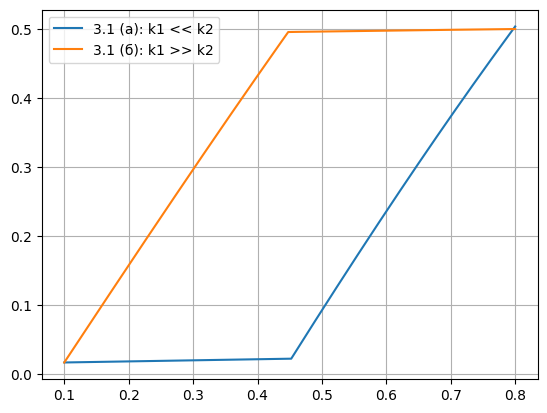

In [4]:
k_funcs = []


def create_K(k1, k2):
    def K(x):
        if x_left <= x <= 0.5 * (x_right + x_left):
            return k1
        if 0.5 * (x_left + x_right) < x <= x_right:
            return k2

    return K


k_funcs.append((create_K(100, 1), "3.1 (a): k1 << k2"))
k_funcs.append((create_K(1, 100), "3.1 (б): k1 >> k2"))

create_plot(k_funcs)

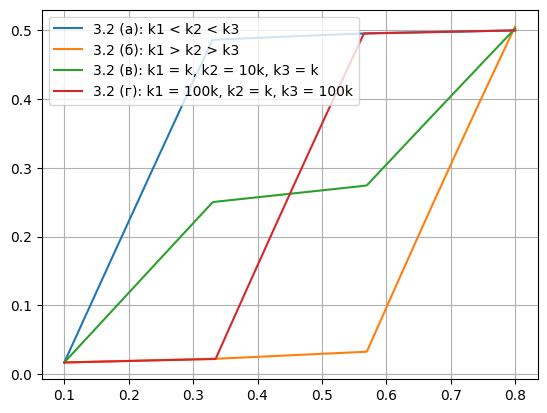

In [5]:
k_funcs = []


def create_K(k1, k2, k3):
    def K(x):
        if x_left <= x <= x_left + (x_right - x_left) / 3:
            return k1
        if x_left + (x_right - x_left) / 3 <= x <= x_left + 2 * (x_right - x_left) / 3:
            return k2
        if x_left + 2 * (x_right - x_left) / 3 < x <= x_right:
            return k3

    return K


k_funcs.append((create_K(1, 50, 100), "3.2 (а): k1 < k2 < k3"))
k_funcs.append((create_K(100, 50, 1), "3.2 (б): k1 > k2 > k3"))
k_funcs.append((create_K(10, 100, 10), "3.2 (в): k1 = k, k2 = 10k, k3 = k"))
k_funcs.append((create_K(100, 1, 100), "3.2 (г): k1 = 100k, k2 = k, k3 = 100k"))

create_plot(k_funcs)

## f(x) — точечный источник тепла